(labs:cor17)=
# 7 Contrast enhancement

## Objective

* Apply histogram transformations

In [35]:
import skimage.io as io
import skimage.color as clr
import matplotlib.pyplot as plt
import skimage.exposure as ex
import numpy as np

The image haze.png has been used in several publications dealing with the problem of removing fog from an image (_dehazing_).

* K. He, J. Sun, X. Tang,
  « Single image haze removal using dark channel prior »,
  _IEEE Transactions on Pattern Analysis and Machine Intelligence_, 2011.
* D. Berman, T. Treibitz, S. Avidan,
  « Non-Local Image Dehazing »,
  CVPR 2016, [website](http://www.eng.tau.ac.il/~berman/NonLocalDehazing/).

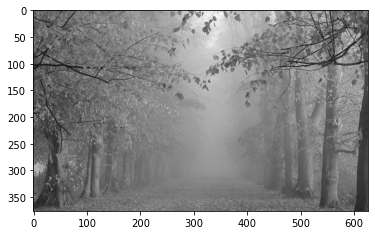

In [36]:
f = io.imread("haze.png")
f = clr.rgb2gray(f)
plt.imshow(f, cmap="gray")
plt.show()

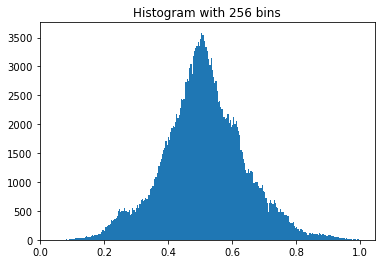

In [37]:
plt.figure()
plt.hist( np.ravel(f), bins=256)
plt.title("Histogram with 256 bins")
plt.show()

The original image and its histogram are given above.
The histogram is mono-modal (it has only one maximum) and uses the full range of intensities quite well.
However, there are few pixels with low or high intensities, explaining the lack of contrast in the image.

Thus, what is the effect on this image of a histogram spread?

## Multiplication by a real

By multiplying the intensities by a coefficient (here: 1.3), the histogram is dilated: low intensities stay weak while high intensities increase.
Therefore the image is lighter, but the dark areas are little changed.
As a result, the contrast is better.
Note that the two images are represented with intensities between 0 (`vmin`) and 1 (` vmax`).

Is this observation still valid for other values of the multiplicative coefficient?

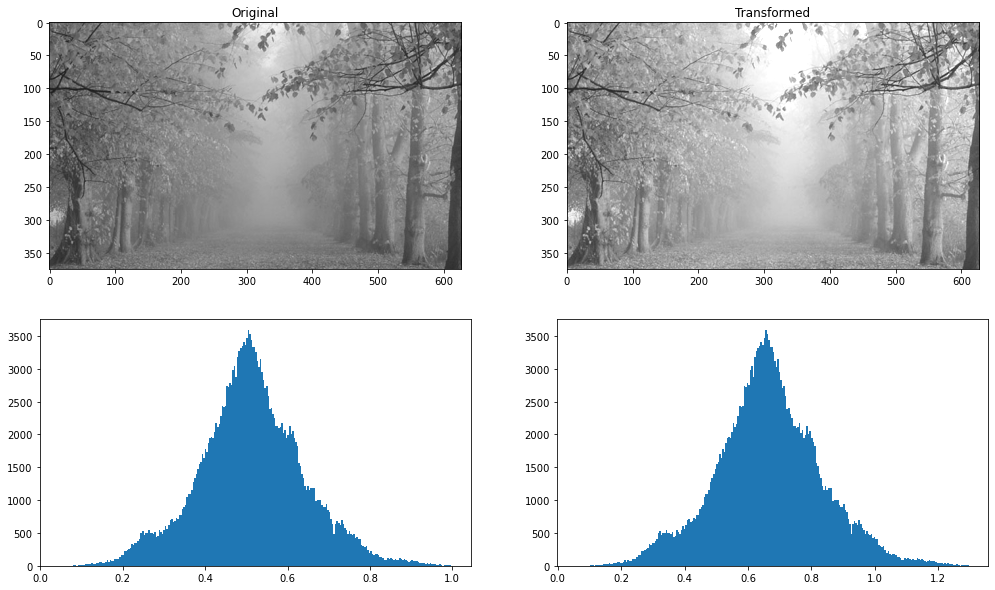

In [38]:
g = 1.3 * f

plt.figure(figsize=(17,10))

plt.subplot(2,2,1)
plt.imshow(f, cmap="gray", vmin=0.0, vmax=1.0)
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(g, cmap="gray", vmin=0.0, vmax=1.0)
plt.title('Transformed')

plt.subplot(2,2,3)
plt.hist( np.ravel(f), bins=256)

plt.subplot(2,2,4)
plt.hist( np.ravel(g), bins=256)

plt.show()

## Histogram equalization

The histogram equalization gives the result below.
The image is more contrasted than previously: this is due to the fact that the histogram of the transformed image is (almost) flat.

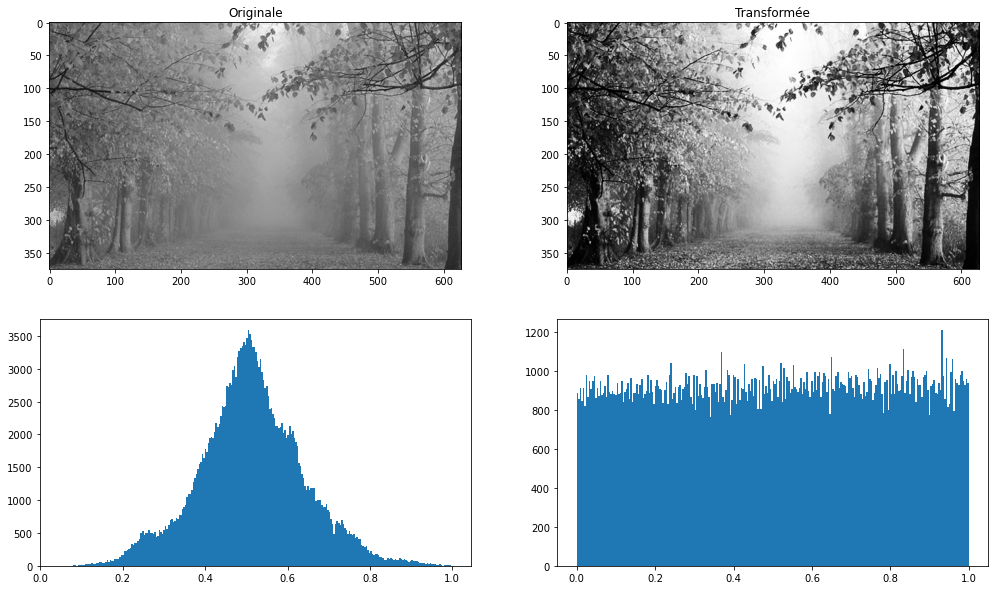

In [39]:
g = ex.equalize_hist(f)

plt.figure(figsize=(17,10))

plt.subplot(2,2,1)
plt.imshow(f, cmap="gray")
plt.title('Originale')

plt.subplot(2,2,2)
plt.imshow(g, cmap="gray")
plt.title('Transformée')

plt.subplot(2,2,3)
plt.hist( np.ravel(f), bins=256)

plt.subplot(2,2,4)
plt.hist( np.ravel(g), bins=256)

plt.show()